In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style = "darkgrid")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/resources/Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


So, we can see the data. Let us get some idea about the problem at hand.

There are many types of stars in the Universe, ranging from Protostars to Red Supergiants. They are classified based on their mass and temperature. The spectra of stars can also organize them (the elements they absorb). A star’s spectral class and its brightness (apparent magnitude) may reveal a lot about it to astronomers.

The data features are as follows:

Temperature — K
L — L/Lo
R — R/Ro
AM — Mv
Colour — General Color of Spectrum
Spectral_Class — O,B,A,F,G,K,M
Type — Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, Super Giants, Hyper Giants

Target features are as follows:

From 0 to 5

Red Dwarf – 0
Brown Dwarf – 1
White Dwarf – 2
Main Sequence – 3
Super Giants – 4
Hyper Giants – 5
Lo = 3.828 x 10^26 Watts
(Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m
(Avg Radius of Sun)

In [ ]:
print(data.shape)

(240, 7)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Now, we check for missing values.

In [ ]:
#Missing Value Analysis
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

Let us perform some analysis of the data distribution.

Text(0.5, 1.0, 'Star Color Analysis')

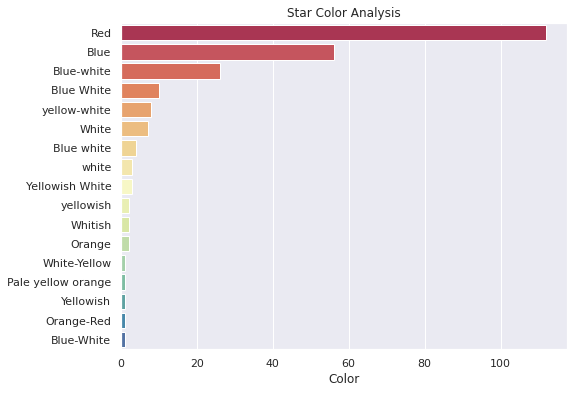

In [ ]:
# Star Colour Analysis:

a= pd.DataFrame(data['Color'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(data= a, x='Color',y= a.index, palette= 'Spectral')
plt.title("Star Color Analysis")

Text(0.5, 1.0, 'Star Spectral Class Analysis')

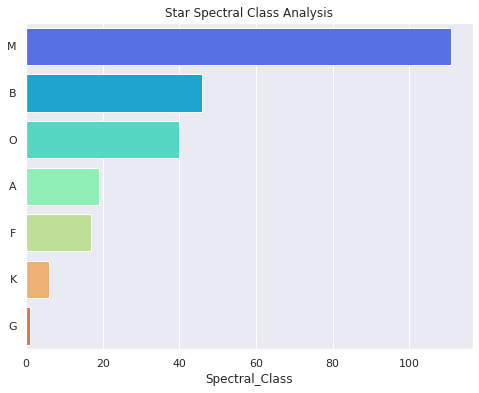

In [ ]:
# Star Spectral Class Analysis:

a= pd.DataFrame(data['Spectral_Class'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(data=a, x='Spectral_Class',y= a.index, palette= 'rainbow')
plt.title("Star Spectral Class Analysis")

Text(0.5, 1.0, 'Percentage Distribution of Star Type')

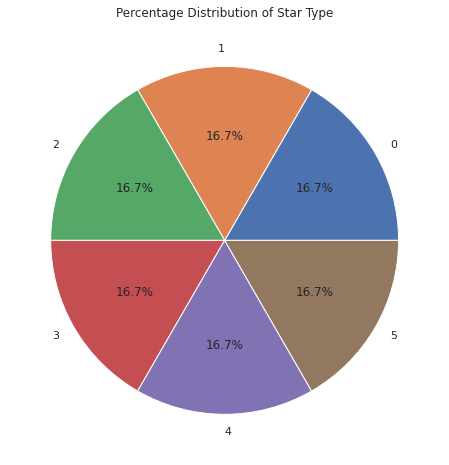

In [ ]:
# Star Type Analysis:

a =pd.DataFrame(data['Type'].value_counts())
plt.figure(figsize=(10,8))
plt.pie(data=a, x='Type',labels=a.index,autopct='%1.1f%%')
plt.title("Percentage Distribution of Star Type")

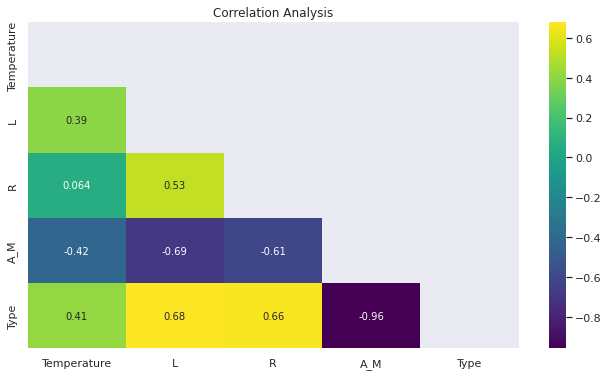

In [ ]:
# Correlation Analysis:

matrix= data.corr()
mask = np.zeros_like(matrix, dtype=float)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(11,6))
sns.heatmap(matrix,annot=True,cmap='viridis',annot_kws = {'size': 10},mask=mask)
plt.title("Correlation Analysis")
plt.show()

Label Encoding
A label is a notation for a feature.

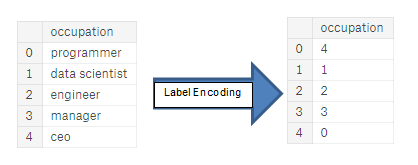

In [ ]:
# Now, let us implement the label encoding.

from sklearn import preprocessing
# label_encoder 
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Now, we apply the encoder to the dataset.

data['Color_Label']= label_encoder.fit_transform(data['Color'])
data['Spectral_Class_Label']= label_encoder.fit_transform(data['Spectral_Class'])

In [ ]:
# Now, let us see what the data looks like.

data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_Label,Spectral_Class_Label
0,3068,0.002400,0.1700,16.12,Red,M,0,8,5
1,3042,0.000500,0.1542,16.60,Red,M,0,8,5
2,2600,0.000300,0.1020,18.70,Red,M,0,8,5
3,2800,0.000200,0.1600,16.65,Red,M,0,8,5
4,1939,0.000138,0.1030,20.06,Red,M,0,8,5


In [ ]:
# Now, we check the original labels for the colours and see what labels are assigned.

print("Original Colours:")
print(data['Color'].unique())
print("Labels:")
print(data['Color_Label'].unique())

Original Colours:
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Labels:
[ 8  1  9 13  2  7  0  4 11 15  5 10 14 16 12  6  3]


In [ ]:
# Now, we check the same for the Spectral class feature.

print("Original Spectral Class:")
print(data['Spectral_Class'].unique())
print("Labels:")
print(data['Spectral_Class_Label'].unique())

Original Spectral Class:
['M' 'B' 'A' 'F' 'O' 'K' 'G']
Labels:
[5 1 0 2 6 4 3]


# Splitting Dataset
Now, we split the dataset into X and y.

In [ ]:
y= data["Spectral_Class_Label"].values
X = data.drop(labels=['Spectral_Class_Label','Color','Spectral_Class'], axis=1).values

#Standard Scalar Normalization
Now, we shall perform Standard Scalar Normalization. StandardScaler adheres to the Standard Normal Distribution (SND). As a result, it sets the mean to 0 and scales the data to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# PCA
Implementation of PCA:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(X)

# The explained variance ratio function in the PCA class returns the variance produced by each principal component.

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.58015798, 0.23500814, 0.06856623, 0.0601706 , 0.04920672,
       0.00689033])

# Training with Two Principal Components
First, we train the Classifier model by taking the two top features. We shall be training a Random Forest Classifier model.

Random forests, also known as random decision forests, are an ensemble learning approach for classification, regression, and other problems that work by training many decision trees. For classification tasks, the random forest’s output is the class chosen by most trees. A random forest comprises Decision Trees, each making its prediction. The values are then averaged (Regression) or max voted (Classification) to arrive at the final result.

The power of this model comes from the ability to create several trees with various sub-features from the features. Because the characteristics chosen for each tree are random, the trees do not grow in-depth and are just focused on the set of features.

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_2 = pca2.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.6875


# Training with Three Principal Components
Now, we proceed with the number of principal components=3.

In [ ]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
X_3 = pca3.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.2, random_state=5)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.7083333333333334


# Training with Four Principal Components
Now, we take the number of principal components=4.

In [ ]:
from sklearn.decomposition import PCA
pca4 = PCA(n_components=4)
X_4 = pca4.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.2, random_state=5)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.7708333333333334


# Conclusion
As we increased the number of features, the model’s accuracy improved.
PCA can be an excellent way to understand which features are more relevant for a particular machine learning problem.
PCA is a practical mathematical approach for reducing data complexity. It finds linear combinations of the input fields that best represent the statistical variation in the complete set of areas. The data components are orthogonal to and unrelated to one another.
We can use PCA to select the most relevant data features.